## Задача: по имеющимся данным найти людей, подозреваемых в мошенничестве.

In [241]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

df = pd.read_csv('data.csv', encoding = 'cp1251', sep = ';')
df.drop(df.iloc[:,3:], axis = 1, inplace = True)
df.head()

,№ страхового события,Участник 1,Участник 2
0,1,Беляев Владислав Аркадьевич,Ефимов Малик Константинович
1,2,Давыдова Ануш Оскаровна,Никифорова Божена Львовна
2,3,Белов Сергей Михайлович,Третьяков Никита Харитонович
3,4,Власов Артём Михайлович,Аксенова Вероника Кузьминична
4,5,Яковлев Алан Макарович,Сысоев Елисей Тимофеевич


In [4]:
df.columns

Index(['№ страхового события', 'Участник 1', 'Участник 2'], dtype='object')

In [5]:
df.rename(columns = {'№ страхового события':'n', 'Участник 1':'p1', 'Участник 2':'p2'}).head()

,n,p1,p2
0,1,Беляев Владислав Аркадьевич,Ефимов Малик Константинович
1,2,Давыдова Ануш Оскаровна,Никифорова Божена Львовна
2,3,Белов Сергей Михайлович,Третьяков Никита Харитонович
3,4,Власов Артём Михайлович,Аксенова Вероника Кузьминична
4,5,Яковлев Алан Макарович,Сысоев Елисей Тимофеевич


In [6]:
sp = df.rename(columns = {'№ страхового события':'n', 'Участник 1':'p1', 'Участник 2':'p2'})
sp.head()

,n,p1,p2
0,1,Беляев Владислав Аркадьевич,Ефимов Малик Константинович
1,2,Давыдова Ануш Оскаровна,Никифорова Божена Львовна
2,3,Белов Сергей Михайлович,Третьяков Никита Харитонович
3,4,Власов Артём Михайлович,Аксенова Вероника Кузьминична
4,5,Яковлев Алан Макарович,Сысоев Елисей Тимофеевич


In [7]:
sp['p1'].value_counts().head()

Дорофеева Гулия Николаевна         3
Мухамадеев Александр Валерьевич    2
Стрелков Евгений Егорович          2
Котова Виктория Архиповна          2
Рожкова Диана Захаровна            1
Name: p1, dtype: int64

In [8]:
sp['p2'].value_counts().head()

Дорофеева Гулия Николаевна       2
Сенчукова Екатерина Семеновна    2
Мамонтов Мстислав Георгиевич     2
Баранова Аделия Ивановна         1
Бобылев Глеб Семенович           1
Name: p2, dtype: int64

In [9]:
a = sp.loc[:,['n','p1']]
a.head()

,n,p1
0,1,Беляев Владислав Аркадьевич
1,2,Давыдова Ануш Оскаровна
2,3,Белов Сергей Михайлович
3,4,Власов Артём Михайлович
4,5,Яковлев Алан Макарович


In [10]:
b = sp.loc[:,['n', 'p2']]
b.head()

,n,p2
0,1,Ефимов Малик Константинович
1,2,Никифорова Божена Львовна
2,3,Третьяков Никита Харитонович
3,4,Аксенова Вероника Кузьминична
4,5,Сысоев Елисей Тимофеевич


In [11]:
b = b.rename(columns = {'p2': 'p'})
b.head()

,n,p
0,1,Ефимов Малик Константинович
1,2,Никифорова Божена Львовна
2,3,Третьяков Никита Харитонович
3,4,Аксенова Вероника Кузьминична
4,5,Сысоев Елисей Тимофеевич


In [12]:
a = a.rename(columns = {'p1':'p'})
a.head()

,n,p
0,1,Беляев Владислав Аркадьевич
1,2,Давыдова Ануш Оскаровна
2,3,Белов Сергей Михайлович
3,4,Власов Артём Михайлович
4,5,Яковлев Алан Макарович


In [13]:
all_p = pd.concat([a, b])
all_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 260
Data columns (total 2 columns):
n    522 non-null int64
p    522 non-null object
dtypes: int64(1), object(1)
memory usage: 12.2+ KB


In [14]:
partic = pd.DataFrame(all_p.loc[:,'p'].value_counts())
partic.head()


,p
Дорофеева Гулия Николаевна,5
Котова Виктория Архиповна,3
Мамонтов Мстислав Георгиевич,3
Сенчукова Екатерина Семеновна,2
Воробьев Иван Александрович,2


#### По людям, у которых была только одна авария, мы вряд ли что-то сможем сказать, слишком мало информации. Попробуем поработать с людьми, у которых >= 2 аварий.

In [15]:
suspects = partic[partic['p'] >= 2]
suspects

,p
Дорофеева Гулия Николаевна,5
Котова Виктория Архиповна,3
Мамонтов Мстислав Георгиевич,3
Сенчукова Екатерина Семеновна,2
Воробьев Иван Александрович,2
Рогачев Антон Владимирович,2
Стрелков Евгений Егорович,2
Павлова Мария Геннадиевна,2
Мухамадеев Александр Валерьевич,2
Комин Сергей Николаевич,2


In [16]:
suspects.iloc[:,0]

Дорофеева Гулия Николаевна         5
Котова Виктория Архиповна          3
Мамонтов Мстислав Георгиевич       3
Сенчукова Екатерина Семеновна      2
Воробьев Иван Александрович        2
Рогачев Антон Владимирович         2
Стрелков Евгений Егорович          2
Павлова Мария Геннадиевна          2
Мухамадеев Александр Валерьевич    2
Комин Сергей Николаевич            2
Коробов Вадим Александрович        2
Name: p, dtype: int64

In [17]:
suspects.index

Index(['Дорофеева Гулия Николаевна', 'Котова Виктория Архиповна',
       'Мамонтов Мстислав Георгиевич', 'Сенчукова Екатерина Семеновна',
       'Воробьев Иван Александрович', 'Рогачев Антон Владимирович',
       'Стрелков Евгений Егорович', 'Павлова Мария Геннадиевна',
       'Мухамадеев Александр Валерьевич', 'Комин Сергей Николаевич',
       'Коробов Вадим Александрович'],
      dtype='object')

### Теперь создадим словарь, где ключами будут имена людей в списке подозреваемых, а значениями - имена людей, с которыми у них были аварии

In [18]:
sp.head()

,n,p1,p2
0,1,Беляев Владислав Аркадьевич,Ефимов Малик Константинович
1,2,Давыдова Ануш Оскаровна,Никифорова Божена Львовна
2,3,Белов Сергей Михайлович,Третьяков Никита Харитонович
3,4,Власов Артём Михайлович,Аксенова Вероника Кузьминична
4,5,Яковлев Алан Макарович,Сысоев Елисей Тимофеевич


In [19]:
sus_dict = {}
for participant in suspects.index:
    acc_with = sp[(sp['p1'] == participant) | (sp['p2'] == participant)].loc[:,['p1','p2']]
    acc_fr_first_col = acc_with['p1'][acc_with['p1'] != participant]
    acc_fr_second_col = acc_with['p2'][acc_with['p2'] != participant]
    # Для людей из колонки p1, с которыми столкнулся participant 
    if len(acc_fr_first_col) != 0:
        for person in acc_fr_first_col:
            if participant in sus_dict:
                sus_dict[participant] += [person]
            else:
                sus_dict[participant] = [person]
# Для людей из колонки p2, с которыми столкнулся participant
    if len(acc_fr_second_col) != 0:
        for person in acc_fr_second_col:
            if participant in sus_dict:
                sus_dict[participant] += [person]
            else:
                sus_dict[participant] = [person]
        
print(sus_dict)
    

    
    

{'Дорофеева Гулия Николаевна': ['Галкина Елена Тарасовна', 'Шубин Всеволод Валерьевич', 'Пахомов Анатолий Васильевич', 'Елисеева Сати Вячеславовна', 'Миронов Пётр Александрович'], 'Котова Виктория Архиповна': ['Королева Радмила Олеговна', 'Цветков Валерий Ростиславович', 'Петухова Медина Максимовна'], 'Мамонтов Мстислав Георгиевич': ['Архипова Анна Игоревна', 'Федотов Ростислав Богуславович', 'Суворов Илья Макарович'], 'Сенчукова Екатерина Семеновна': ['Мухамадеев Александр Валерьевич', 'Рогачев Антон Владимирович'], 'Воробьев Иван Александрович': ['Павлова Мария Геннадиевна', 'Комин Сергей Николаевич'], 'Рогачев Антон Владимирович': ['Коробов Вадим Александрович', 'Сенчукова Екатерина Семеновна'], 'Стрелков Евгений Егорович': ['Александрова Лариса Евгеньевна', 'Силина Радмила Викторовна'], 'Павлова Мария Геннадиевна': ['Комин Сергей Николаевич', 'Воробьев Иван Александрович'], 'Мухамадеев Александр Валерьевич': ['Сенчукова Екатерина Семеновна', 'Коробов Вадим Александрович'], 'Комин С

In [150]:
suspects

,p
Дорофеева Гулия Николаевна,5
Мамонтов Мстислав Георгиевич,3
Котова Виктория Архиповна,3
Рогачев Антон Владимирович,2
Стрелков Евгений Егорович,2
Павлова Мария Геннадиевна,2
Коробов Вадим Александрович,2
Сенчукова Екатерина Семеновна,2
Воробьев Иван Александрович,2
Мухамадеев Александр Валерьевич,2


In [21]:
final_sus_list = []
for person in sus_dict:
    s = 0
    for people in sus_dict[person]:
        if people not in suspects.index:
            s += 1
            break
        else:
            continue
    if s == 0:
        final_sus_list += [person]
        
        
print(final_sus_list)




['Сенчукова Екатерина Семеновна', 'Воробьев Иван Александрович', 'Рогачев Антон Владимирович', 'Павлова Мария Геннадиевна', 'Мухамадеев Александр Валерьевич', 'Комин Сергей Николаевич', 'Коробов Вадим Александрович']


In [ ]:
import networkx as nx

In [199]:
my_G = nx.DiGraph()

In [200]:
my_G.number_of_nodes(), my_G.number_of_edges()

(0, 0)

In [201]:
# Соберем всех подозреваемых в список
sp_gr = []
for u in sus_dict.keys():
    sp_gr += [u]

# Теперь в цикле добавляем все элементы списка как вершины графа
for suspect in sp_gr:
    my_G.add_node(suspect)

print(my_G.number_of_nodes()) # все 11 человек добавились как вершины графа
    

11


In [208]:
'''Будем в цикле пробегаться по ключам словаря с подозреваемыми и проводить ребра графа, проводя ребро 
графа между вершинами, если между соответствующими людьми была авария'''
for suspect in sus_dict:
    my_G.add_edges_from([(suspect, x) for x in sus_dict[suspect]])
    

In [209]:
my_G.number_of_edges() # количество ребер графа

27

In [210]:
my_G.number_of_nodes() 
'''количество вершин графа изменилось, потому что проводя ребра графа, мы добавляли как вершины 
участников аварий, которые ранее были исключены из списка потому что у них только одна авария'''


24

In [292]:
set_for_values = set()
for x in sus_dict:
    set_for_values.update(set(sus_dict[x]))

'''Взяли все значения словаря, теперь добавим в это множество все ключи словаря, т.к. могут быть люди, 
которые сталкивались с людьми вне данного списка (т.е. с людьми, у которых была только одна авария и 
которых ранее мы исключили из списка подозреваемых из-за отсутствия информации)''' 

In [299]:
set_for_values.update(set(sus_dict.keys()))

In [301]:
len(set_for_values) 
"""теперь в нашем множестве все ФИО участников аварий, взаимодействовавших с людьми из списка 
подозреваемых"""

24

In [303]:
# Для удобного отображения подписей на рисунке присвоим каждому человеку соответствующий номер

set_for_values.update(set(sus_dict))
map_person_to_number = dict(zip(set_for_values, [i for i in range(1, len(set_for_values) + 1)]))

map_person_to_number

{'Александрова Лариса Евгеньевна': 24,
 'Архипова Анна Игоревна': 11,
 'Воробьев Иван Александрович': 10,
 'Галкина Елена Тарасовна': 6,
 'Дорофеева Гулия Николаевна': 1,
 'Елисеева Сати Вячеславовна': 13,
 'Комин Сергей Николаевич': 4,
 'Коробов Вадим Александрович': 19,
 'Королева Радмила Олеговна': 12,
 'Котова Виктория Архиповна': 20,
 'Мамонтов Мстислав Георгиевич': 23,
 'Миронов Пётр Александрович': 5,
 'Мухамадеев Александр Валерьевич': 16,
 'Павлова Мария Геннадиевна': 21,
 'Пахомов Анатолий Васильевич': 7,
 'Петухова Медина Максимовна': 2,
 'Рогачев Антон Владимирович': 15,
 'Сенчукова Екатерина Семеновна': 8,
 'Силина Радмила Викторовна': 22,
 'Стрелков Евгений Егорович': 17,
 'Суворов Илья Макарович': 9,
 'Федотов Ростислав Богуславович': 3,
 'Цветков Валерий Ростиславович': 14,
 'Шубин Всеволод Валерьевич': 18}

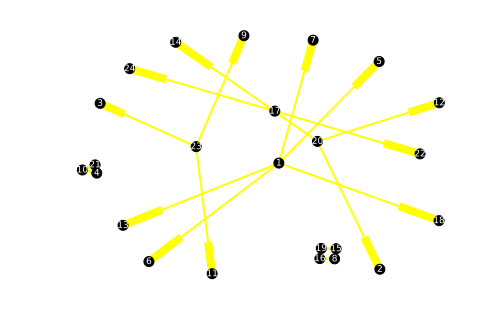

In [330]:
mapped_G = nx.relabel_nodes(my_G, map_person_to_number)
options = {
     'edge_color':'yellow',
     'node_color': 'black',
     'node_size': 100,
     'width': 2,
     'with_labels': True,
    'font_size': 9, # размер шрифта
    'font_color': 'white'
 }
    
nx.draw(mapped_G, **options)
plt.figure('beautifulGraph.png');

#### Очень большие подозрения вызывают 2 группы вершин, образовавших замкнутые циклы. В каждой из двух этих групп у людей по 2 аварии и по странному стечению обстоятельств они фактически попадают в аварии друг с другом.

In [333]:
# Подозрительные номера: 10, 4, 21 - группа 1; 19, 15, 16, 8 - группа 2. Извлечем имена по этим номерам

# Выведен отдельно участников обеих групп:
group1 = []
group2 = []
for x in map_person_to_number:
    if map_person_to_number[x] in (10, 4, 21):
        group1 += [x]
    elif map_person_to_number[x] in (19, 15, 16, 8):
        group2 += [x]
    
print("Группа 1: " + ", ".join([i for i in group1]) + "\n" + "Группа 2: " + ", ".join([j for j in group2]))


Группа 1: Комин Сергей Николаевич, Воробьев Иван Александрович, Павлова Мария Геннадиевна
Группа 2: Сенчукова Екатерина Семеновна, Рогачев Антон Владимирович, Мухамадеев Александр Валерьевич, Коробов Вадим Александрович
